# <span style="color:green"> CHAPERT 10 TIME SERIES ANALYSIS </span>

```The roots of pandas lay in analyzing financial time series data. The author, Wes McKinney, was not satisfied with the available Python tools at that time, and decided to build pandas to support his own needs at the hedge fund he was working at.``` 

```Broadly speaking, time series are simply points of data gathered over time. Most typically, the time is evenly spaced between each data point```

## Understanding the difference between Python and pandas date tools

In [2]:
import datetime

In [2]:
date = datetime.date(year = 2013, month = 6, day=7)
print("date is ", date)

date is  2013-06-07


In [3]:
time = datetime.time(hour = 12, minute=30, second=19, microsecond= 46312)
print("time is", time)

time is 12:30:19.046312


In [4]:
datetime_1 = datetime.datetime(year=2013, month=6, day=7,hour=12, minute=30, second=19, microsecond=463198)
print("datetime is", datetime_1)

datetime is 2013-06-07 12:30:19.463198


In [5]:
time_delta = datetime.timedelta(weeks=2, days=5, hours=10, minutes=20, seconds=6.73, milliseconds=99, microseconds=8)
print("timedelta is", time_delta)

timedelta is 19 days, 10:20:06.829008


In [6]:
# We can Add/subtract timedelta to: date and datetime objects
print('new date is', date + time_delta)
print('new datetime is', datetime_1 + time_delta)

new date is 2013-06-26
new datetime is 2013-06-26 22:50:26.292206


In [7]:
#Attempting to add a timedelta to a time object isn't possible:
#time + time_delta

Let's turn to pandas and its Timestamp object, which is a moment in time with
nanosecond precision. The Timestamp constructor is very flexible, and handles a
wide variety of inputs:

In [8]:
print(pd.Timestamp(year=2012, month=12, day=21, hour=5, minute=10, second=8, microsecond=99))
print(pd.Timestamp('2016/1/10'))
print(pd.Timestamp('2014-5/10'))
print(pd.Timestamp('Jan 3, 2019 20:45.56'))

2012-12-21 05:10:08.000099
2016-01-10 00:00:00
2014-05-10 00:00:00
2019-01-03 20:45:33


In [9]:
#It's also possible to pass in a single integer or float to the Timestamp constructor
#which returns a date equivalent to the number of nanoseconds after the Unix
#epoch, which is January 1, 1970:

print(pd.Timestamp(500))
print(pd.Timestamp(5000, unit='D'))

1970-01-01 00:00:00.000000500
1983-09-10 00:00:00


In [10]:
# Pandas provides the to_datetime function that works fairly similarly to the
# Timestamp constructor, but comes with a few different parameters for special situations.

print(pd.to_datetime('2015-5-13'))

print(pd.to_datetime('2015-13-5', dayfirst=True))

print(pd.to_datetime('Start Date: Sep 30, 2017 Start Time: 1:30 pm',format='Start Date: %b %d, %Y Start Time: %I:%M %p'))

print(pd.to_datetime(100, unit='D', origin='2013-1-1'))

2015-05-13 00:00:00
2015-05-13 00:00:00
2017-09-30 13:30:00
2013-04-11 00:00:00


In [11]:
# Analogously to the Timestamp constructor and the to_datetime function, pandas has Timedelta and to_timedelta 
# to represent an amount of time. Both the Timedelta constructor and the to_timedelta function can create a single
# Timedelta object.

# Like to_datetime, to_timedelta has quite a bit more
# functionality and can convert entire lists or Series into Timedelta objects.


print(pd.Timedelta('12 days 5 hours 3 minutes 123456789 nanoseconds'))

print(pd.Timedelta(days=5, minutes=7.34))

print(pd.Timedelta(100, unit='W'))

print(pd.to_timedelta('67:15:45.454'))

12 days 05:03:00.123456789
5 days 00:07:20.400000
700 days 00:00:00
2 days 19:15:45.454000


In [12]:
# Timedeltas may be added or subtracted from Timestamps and from each other.
# They may even be divided from each other to return a float:

pd.Timedelta('12 days 5 hours 3 minutes') * 2

Timedelta('24 days 10:06:00')

In [13]:
# Both Timestamps and Timedeltas have a large numbera of features available as
# attributes and methods.
ts = pd.Timestamp('2016-10-1 4:23:23.9')

In [14]:
ts.ceil('h')

Timestamp('2016-10-01 05:00:00')

In [15]:
ts.year, ts.month, ts.day, ts.hour, ts.minute, ts.second

(2016, 10, 1, 4, 23, 23)

In [16]:
ts.dayofweek, ts.dayofyear, ts.daysinmonth

(5, 275, 31)

In [17]:
ts.to_pydatetime()

datetime.datetime(2016, 10, 1, 4, 23, 23, 900000)

In [18]:
td = pd.Timedelta(125.8723, unit='h')

In [19]:
td.round('min')

Timedelta('5 days 05:52:00')

In [20]:
td.components

Components(days=5, hours=5, minutes=52, seconds=20, milliseconds=280, microseconds=0, nanoseconds=0)

In [21]:
td.total_seconds()

453140.28

## Slicing time series intelligently

In [1]:
import tables

In [3]:
crime = pd.read_hdf(r"C:\Users\MSI\Desktop\Kookmin\Second semester\Programming analysis\Pandas Cookbook\crime.h5",)

In [4]:
crime.head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,traffic-accident-dui-duid,traffic-accident,2014-06-29 02:01:00,-105.000149,39.745753,cbd,0,1
1,vehicular-eluding-no-chase,all-other-crimes,2014-06-29 01:54:00,-104.884660,39.738702,east-colfax,1,0
2,disturbing-the-peace,public-disorder,2014-06-29 02:00:00,-105.020719,39.706674,athmar-park,1,0
3,curfew,public-disorder,2014-06-29 02:18:00,-105.001552,39.769505,sunnyside,1,0
4,aggravated-assault,aggravated-assault,2014-06-29 04:17:00,-105.018557,39.679229,college-view-south-platte,1,0


In [24]:
crime.set_index('REPORTED_DATE', inplace= True)

In [25]:
#Notice that there are three categorical columns and a Timestamp (denoted by NumPy's datetime64 object).
#REMEMBER category types use less memory 
crime.dtypes

OFFENSE_TYPE_ID        category
OFFENSE_CATEGORY_ID    category
GEO_LON                 float64
GEO_LAT                 float64
NEIGHBORHOOD_ID        category
IS_CRIME                  int64
IS_TRAFFIC                int64
dtype: object

In [26]:
# As usual, it is possible to select all the rows equal to a single index by passing that value to the .loc
crime.loc['2016-05-12 16:45:00']

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2016-05-12 16:45:00,traffic-accident,traffic-accident,-104.847024,39.779596,montbello,0,1
2016-05-12 16:45:00,traffic-accident,traffic-accident,-105.049180,39.769296,west-highland,0,1
2016-05-12 16:45:00,fraud-identity-theft,white-collar-crime,-104.931971,39.717359,hilltop,1,0


In [27]:
# With a Timestamp in the index, it is possible to select all rows that partially match an index value.
crime.loc['2016-05-12'].head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2016-05-12 23:51:00,criminal-mischief-other,public-disorder,-105.017241,39.705845,athmar-park,1,0
2016-05-12 18:40:00,liquor-possession,drug-alcohol,-104.995692,39.747875,cbd,1,0
2016-05-12 22:26:00,traffic-accident,traffic-accident,-104.880037,39.777037,stapleton,0,1
2016-05-12 20:35:00,theft-bicycle,larceny,-104.929350,39.763797,northeast-park-hill,1,0
2016-05-12 09:39:00,theft-of-motor-vehicle,auto-theft,-104.941233,39.775510,elyria-swansea,1,0


In [28]:
# Not only can you select a single date inexactly, but you can do so for an entire
# month, year, or even hour of the day:

crime.loc['2016-05'].head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2016-05-02 01:11:00,public-order-crimes-other,all-other-crimes,-104.959488,39.771389,clayton,1,0
2016-05-02 17:30:00,traffic-accident-hit-and-run,traffic-accident,-104.985704,39.781041,globeville,0,1
2016-05-02 15:15:00,theft-of-motor-vehicle,auto-theft,-104.957429,39.779528,elyria-swansea,1,0
2016-05-01 04:50:00,traffic-accident-hit-and-run,traffic-accident,-105.035241,39.699792,westwood,0,1
2016-05-01 10:02:00,theft-items-from-vehicle,theft-from-motor-vehicle,-104.944782,39.729557,congress-park,1,0


In [29]:
crime.loc['2016-05-12 03'].head() #03 por hora 3

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2016-05-12 03:11:00,theft-shoplift,larceny,-105.020586,39.678224,college-view-south-platte,1,0
2016-05-12 03:43:00,traf-other,all-other-crimes,-104.892862,39.740153,east-colfax,1,0
2016-05-12 03:18:00,criminal-trespassing,all-other-crimes,-104.990480,39.728076,lincoln-park,1,0
2016-05-12 03:13:00,assault-simple,other-crimes-against-persons,-104.977202,39.739745,capitol-hill,1,0


In [30]:
crime.loc['Dec 2015'].sort_index()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2015-12-01 00:48:00,drug-cocaine-possess,drug-alcohol,-104.891681,39.740155,east-colfax,1,0
2015-12-01 00:48:00,theft-of-motor-vehicle,auto-theft,-104.891681,39.740155,east-colfax,1,0
2015-12-01 01:00:00,criminal-mischief-other,public-disorder,-104.993574,39.739773,civic-center,1,0
2015-12-01 01:10:00,traf-other,all-other-crimes,-104.995496,39.725618,baker,1,0
2015-12-01 01:10:00,traf-habitual-offender,all-other-crimes,-104.995496,39.725618,baker,1,0
...,...,...,...,...,...,...,...
2015-12-31 23:35:00,drug-cocaine-possess,drug-alcohol,-104.988019,39.753420,five-points,1,0
2015-12-31 23:40:00,traffic-accident,traffic-accident,-104.945076,39.736768,congress-park,0,1
2015-12-31 23:44:00,drug-cocaine-possess,drug-alcohol,-104.966814,39.746460,city-park-west,1,0


In [31]:
#ofcourse, like other examples of crime 
crime.loc['2015-3-4':'2016-1-1'].sort_index()

C:\Users\MSI\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  


,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2015-03-04 00:11:00,assault-dv,other-crimes-against-persons,-105.021966,39.770883,sunnyside,1,0
2015-03-04 00:19:00,assault-dv,other-crimes-against-persons,-104.978988,39.748799,five-points,1,0
2015-03-04 00:27:00,theft-of-services,larceny,-105.055082,39.790564,regis,1,0
2015-03-04 00:49:00,traffic-accident-hit-and-run,traffic-accident,-104.987454,39.701378,washington-park-west,0,1
2015-03-04 01:07:00,burglary-business-no-force,burglary,-105.010843,39.762538,highland,1,0
...,...,...,...,...,...,...,...
2016-01-01 23:15:00,traffic-accident-hit-and-run,traffic-accident,-104.996861,39.738612,civic-center,0,1
2016-01-01 23:16:00,traffic-accident,traffic-accident,-105.025088,39.707590,westwood,0,1
2016-01-01 23:40:00,robbery-business,robbery,-105.039236,39.726157,villa-park,1,0


```Notice that all crimes committed on the end date regardless of the time are included in the returned result.```

```This is true for any result using the label-based .loc indexer.```

In [32]:
crime.loc['2015-3-4 22':'2016-1-1 23:45:00'].sort_index()

C:\Users\MSI\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  """Entry point for launching an IPython kernel.


,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2015-03-04 22:25:00,traffic-accident-hit-and-run,traffic-accident,-104.973896,39.769064,five-points,0,1
2015-03-04 22:30:00,traffic-accident,traffic-accident,-104.906412,39.632816,hampden-south,0,1
2015-03-04 22:32:00,traffic-accident-hit-and-run,traffic-accident,-104.979180,39.706613,washington-park-west,0,1
2015-03-04 22:33:00,traffic-accident-hit-and-run,traffic-accident,-104.991655,39.740067,civic-center,0,1
2015-03-04 22:36:00,theft-unauth-use-of-ftd,white-collar-crime,-105.045235,39.667928,harvey-park,1,0
...,...,...,...,...,...,...,...
2016-01-01 23:07:00,traf-other,all-other-crimes,-104.980400,39.740144,north-capitol-hill,1,0
2016-01-01 23:15:00,traffic-accident-hit-and-run,traffic-accident,-104.996861,39.738612,civic-center,0,1
2016-01-01 23:16:00,traffic-accident,traffic-accident,-105.025088,39.707590,westwood,0,1


#### Personally, I prefer using the .loc indexer when selecting rows and would always use it over the indexing operator by itself. The .loc indexer is explicit and the first value passed  to it is always used to select rows.

> ## REMEMBER: . Sorting the index USUALLY will lead to large gains in performance. 

In [33]:
#%timeit crime['2015-3-4':'2016-1-1']

C:\Users\MSI\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  """Entry point for launching an IPython kernel.


AssertionError: <class 'numpy.ndarray'>

In [34]:
%timeit crime.loc['2015-3-4':'2016-1-1']

C:\Users\MSI\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  """Entry point for launching an IPython kernel.
C:\Users\MSI\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  """Entry point for launching an IPython kernel.
C:\Users\MSI\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  """Entry point for launching an IPython kernel.
C:\Users\MSI\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Value based partial slicing

C:\Users\MSI\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  """Entry point for launching an IPython kernel.
C:\Users\MSI\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  """Entry point for launching an IPython kernel.
C:\Users\MSI\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  """Entry point for launching an IPython kernel.
C:\Users\MSI\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Value based partial slicing

C:\Users\MSI\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  """Entry point for launching an IPython kernel.
C:\Users\MSI\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  """Entry point for launching an IPython kernel.
C:\Users\MSI\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  """Entry point for launching an IPython kernel.
C:\Users\MSI\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Value based partial slicing

35.4 ms ± 1.54 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


C:\Users\MSI\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  """Entry point for launching an IPython kernel.
C:\Users\MSI\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  """Entry point for launching an IPython kernel.
C:\Users\MSI\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  """Entry point for launching an IPython kernel.


In [35]:
crime_sort = crime.sort_index()
%timeit crime_sort.loc['2015-3-4':'2016-1-1']

4.51 ms ± 344 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Using methods that only work with a DatetimeIndex

In [36]:
crime = pd.read_hdf(r"C:\Users\MSI\Desktop\Kookmin\Second semester\Programming analysis\Pandas Cookbook\crime.h5",).set_index('REPORTED_DATE')

In [37]:
crime

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2014-06-29 02:01:00,traffic-accident-dui-duid,traffic-accident,-105.000149,39.745753,cbd,0,1
2014-06-29 01:54:00,vehicular-eluding-no-chase,all-other-crimes,-104.884660,39.738702,east-colfax,1,0
2014-06-29 02:00:00,disturbing-the-peace,public-disorder,-105.020719,39.706674,athmar-park,1,0
2014-06-29 02:18:00,curfew,public-disorder,-105.001552,39.769505,sunnyside,1,0
2014-06-29 04:17:00,aggravated-assault,aggravated-assault,-105.018557,39.679229,college-view-south-platte,1,0
...,...,...,...,...,...,...,...
2017-09-13 05:48:00,burglary-business-by-force,burglary,-105.033840,39.762365,west-highland,1,0
2017-09-12 20:37:00,weapon-unlawful-discharge-of,all-other-crimes,-105.040313,39.721264,barnum-west,1,0
2017-09-12 16:32:00,traf-habitual-offender,all-other-crimes,-104.847024,39.779596,montbello,1,0


In [38]:
# Use the between_time method to select all crimes that occurred between 2 a.m.
# and 5 a.m., regardless of the date:

crime.between_time('2:00','5:00', include_end = False).head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2014-06-29 02:01:00,traffic-accident-dui-duid,traffic-accident,-105.000149,39.745753,cbd,0,1
2014-06-29 02:00:00,disturbing-the-peace,public-disorder,-105.020719,39.706674,athmar-park,1,0
2014-06-29 02:18:00,curfew,public-disorder,-105.001552,39.769505,sunnyside,1,0
2014-06-29 04:17:00,aggravated-assault,aggravated-assault,-105.018557,39.679229,college-view-south-platte,1,0
2014-06-29 04:22:00,violation-of-restraining-order,all-other-crimes,-104.972447,39.739449,cheesman-park,1,0


In [39]:
# Select all dates at a specific time with at_time:
crime.at_time('5:47')

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2013-11-26 05:47:00,criminal-mischief-other,public-disorder,-104.991476,39.751536,cbd,1,0
2017-04-09 05:47:00,criminal-mischief-mtr-veh,public-disorder,-104.959394,39.678425,university,1,0
2017-02-19 05:47:00,criminal-mischief-other,public-disorder,-104.986767,39.741336,north-capitol-hill,1,0
2017-02-16 05:47:00,aggravated-assault,aggravated-assault,-104.934029,39.732320,hale,1,0
2017-02-12 05:47:00,police-interference,all-other-crimes,-104.976306,39.722644,speer,1,0
...,...,...,...,...,...,...,...
2013-09-10 05:47:00,traffic-accident,traffic-accident,-104.986311,39.708426,washington-park-west,0,1
2013-03-14 05:47:00,theft-other,larceny,-105.047861,39.727237,villa-park,1,0
2012-10-08 05:47:00,theft-items-from-vehicle,theft-from-motor-vehicle,-105.037308,39.768336,west-highland,1,0


In [40]:
#for this we need the inde to be sorted
crime_sort.first(pd.offsets.MonthBegin(6))

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0
...,...,...,...,...,...,...,...
2012-06-30 23:40:00,traffic-accident-dui-duid,traffic-accident,-104.922266,39.678471,goldsmith,0,1
2012-06-30 23:44:00,traffic-accident,traffic-accident,-104.987578,39.711158,baker,0,1
2012-06-30 23:50:00,criminal-mischief-mtr-veh,public-disorder,-104.838271,39.788683,montbello,1,0


In [41]:
# This captured nearly the same amount of data but if you look closely, only a single row from June 30th
#was captured. 

#Again, this is because the time component of the first index was preserved. The exact search went to 2012-06-30
# 00:06:00. So, how do we get exactly six months of data? #no incluye ese 

crime_sort.first(pd.offsets.MonthBegin(6, normalize=True))

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0
...,...,...,...,...,...,...,...
2012-06-30 23:40:00,traffic-accident-hit-and-run,traffic-accident,-104.922266,39.678471,goldsmith,0,1
2012-06-30 23:40:00,traffic-accident-dui-duid,traffic-accident,-104.922266,39.678471,goldsmith,0,1
2012-06-30 23:44:00,traffic-accident,traffic-accident,-104.987578,39.711158,baker,0,1


In [42]:
#We can also use the end of the month
crime_sort.first(pd.offsets.MonthEnd(6))

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0
...,...,...,...,...,...,...,...
2012-06-29 23:01:00,aggravated-assault,aggravated-assault,-105.019673,39.733250,sun-valley,1,0
2012-06-29 23:11:00,traffic-accident,traffic-accident,-104.918451,39.653080,southmoor-park,0,1
2012-06-29 23:41:00,robbery-street,robbery,-104.991912,39.756163,five-points,1,0


```There are a dozen DateOffset objects for very precisely moving forward or backward to the next nearest offset. Instead of hunting down the DateOffset objects in pd.offsets, you can use a string called 
an *** offset alias**** instead.```

For instance, the string for MonthEnd is M and for MonthBegin is MS.

In [43]:
crime_sort.first('5D') # 5 days
crime_sort.first('5B') # 5 business days
crime_sort.first('7W') # 7 weeks, with weeks ending on Sunday
crime_sort.first('3QS') # 3rd quarter start
crime_sort.first('A') # one year end

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0
...,...,...,...,...,...,...,...
2012-12-30 23:13:00,traffic-accident,traffic-accident,-104.973097,39.740032,capitol-hill,0,1
2012-12-30 23:14:00,burglary-residence-no-force,burglary,-104.960898,39.697153,washington-park,1,0
2012-12-30 23:39:00,theft-of-motor-vehicle,auto-theft,-105.002180,39.769714,sunnyside,1,0


## Counting the number of weekly crimes

In [44]:
# In order to count the number of crimes per week, we need to form a group for each week.

#The ***resample*** method takes a DateOffset object or alias and returns an object ready to perform an 
# action on all groups. SIMILAR ta Groupby

crime_sort.resample('W') #semanas (ver offsets alias)

In [45]:
# There are several methods that we can chain after calling resample to return some data. 
#Let's chain the size method to count the number  of weekly crimes:

week_crimes = crime_sort.resample('W').size()
week_crimes.head()

REPORTED_DATE
2012-01-08     877
2012-01-15    1071
2012-01-22     991
2012-01-29     988
2012-02-05     888
Freq: W-SUN, dtype: int64

In [46]:
# Let's choose a different day to end the week besides Sunday with an anchored offset:
crime_sort.resample('W-THU').size().head()

REPORTED_DATE
2012-01-05     462
2012-01-12    1116
2012-01-19     924
2012-01-26    1061
2012-02-02     926
Freq: W-THU, dtype: int64

<AxesSubplot:title={'center':'All Denver Crimes'}, xlabel='REPORTED_DATE'>

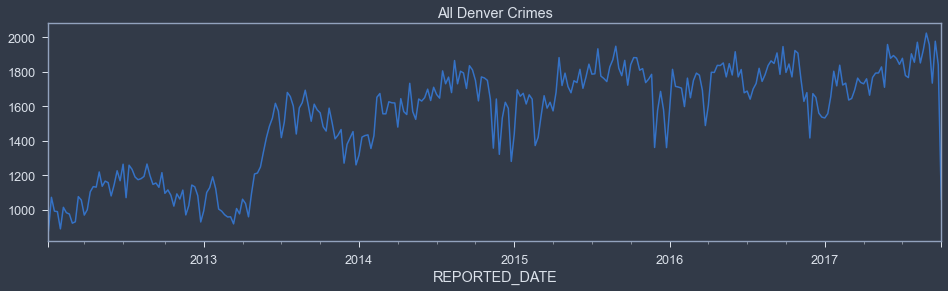

In [47]:
week_crimes.plot(figsize = (16,4), title = 'All Denver Crimes')

## Aggregating weekly crime and traffic accidents separately

In [48]:
#The Denver crime dataset has all crime and traffic accidents together in one table, and
#separates them through the binary columns, IS_CRIME and IS_TRAFFIC

#Use the resample method to group by each quarter of the year and then sum the IS_CRIME and IS_TRAFFIC columns
#for each group:

crime_quarterly = crime_sort.resample('Q')['IS_CRIME','IS_TRAFFIC'].sum()
crime_quarterly.head()

,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,
2012-03-31,7882,4726
2012-06-30,9641,5255
2012-09-30,10566,5003
2012-12-31,9197,4802
2013-03-31,8730,4442


In [49]:
# Notice that the dates all appear as the last day of the quarter. This is because the
# offset alias, Q, represents the end of the quarter.

#Let's use the offset alias QS to represent the start of the quarter:
crime_sort.resample('QS')['IS_CRIME','IS_TRAFFIC'].sum().head()

#Immediately after calling the resample method, we can continue either by chaining
#a method or by selecting a group of columns to aggregate

,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,
2012-01-01,7882,4726
2012-04-01,9641,5255
2012-07-01,10566,5003
2012-10-01,9197,4802
2013-01-01,8730,4442


In [50]:
# It is possible to replicate this operation using the groupby method:
#crime_quarterly2 = crime_sort.groupby(pd.Grouper(freq='Q'))['IS_CRIME', 'IS_TRAFFIC'].sum()

<AxesSubplot:title={'center':'Denver crime and traffic accidents'}, xlabel='REPORTED_DATE'>

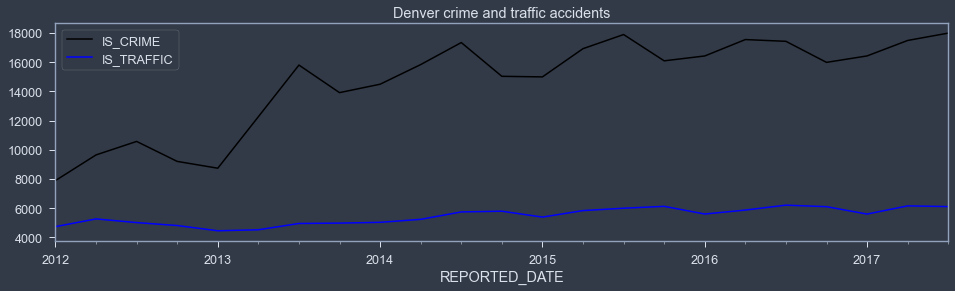

In [51]:
#Let's make a plot to better analyze the trends in crime and traffic accidents over
crime_quarterly.plot(figsize =(16,4), color=['black', 'blue'], title='Denver crime and traffic accidents')

> parece que los primeros 2 quarters son los que tienen mas accidentes. Estos seria primaver y verano. En comparacion, los ultimos dos quarters (los mas frios) son los menos violentos?

In [52]:
# Most public businesses report quarterly earnings but they don't all have the same calendar
# year beginning in January.

#For instance, if we wanted our quarters to begin March 1st, then
# we could use QS-MAR to anchor our offset alias:

crime_quarterly.resample('QS-MAR')['IS_CRIME', 'IS_TRAFFIC'].sum().head() #sum es opcional al parecer

,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,
2012-03-01,7882,4726
2012-06-01,9641,5255
2012-09-01,10566,5003
2012-12-01,9197,4802
2013-03-01,8730,4442


<AxesSubplot:xlabel='REPORTED_DATE'>

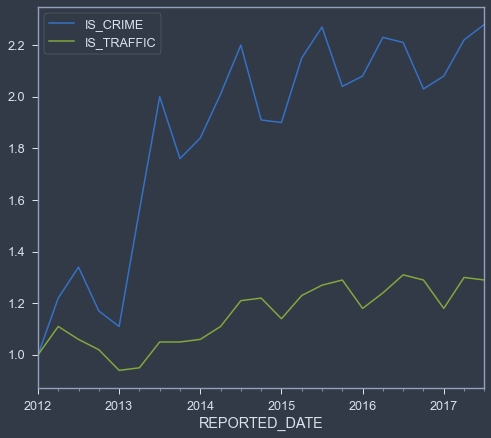

In [53]:
# To get a different visual perspective, we can plot the percentage increase in crime and
# traffic, instead of the raw count.
crime_begin = crime_quarterly.iloc[0]

crime_quarterly.div(crime_begin).round(2).plot()

## Measuring crime by weekday and year

In [54]:
crime.head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2014-06-29 02:01:00,traffic-accident-dui-duid,traffic-accident,-105.000149,39.745753,cbd,0,1
2014-06-29 01:54:00,vehicular-eluding-no-chase,all-other-crimes,-104.884660,39.738702,east-colfax,1,0
2014-06-29 02:00:00,disturbing-the-peace,public-disorder,-105.020719,39.706674,athmar-park,1,0
2014-06-29 02:18:00,curfew,public-disorder,-105.001552,39.769505,sunnyside,1,0
2014-06-29 04:17:00,aggravated-assault,aggravated-assault,-105.018557,39.679229,college-view-south-platte,1,0


> ```All Timestamp columns have a special attribute called the dt accessor, which
gives access to a variety of extra attributes and methods specifically designed for
them.```

In [5]:
crime = pd.read_hdf(r"C:\Users\MSI\Desktop\Kookmin\Second semester\Programming analysis\Pandas Cookbook\crime.h5", 'crime')

In [6]:
crime.head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,traffic-accident-dui-duid,traffic-accident,2014-06-29 02:01:00,-105.000149,39.745753,cbd,0,1
1,vehicular-eluding-no-chase,all-other-crimes,2014-06-29 01:54:00,-104.884660,39.738702,east-colfax,1,0
2,disturbing-the-peace,public-disorder,2014-06-29 02:00:00,-105.020719,39.706674,athmar-park,1,0
3,curfew,public-disorder,2014-06-29 02:18:00,-105.001552,39.769505,sunnyside,1,0
4,aggravated-assault,aggravated-assault,2014-06-29 04:17:00,-105.018557,39.679229,college-view-south-platte,1,0


In [9]:
wd_counts = crime['REPORTED_DATE'].dt.day_name().value_counts()
wd_counts

Monday       70024
Friday       69621
Wednesday    69538
Thursday     69287
Tuesday      68394
Saturday     58834
Sunday       55213
Name: REPORTED_DATE, dtype: int64

<AxesSubplot:title={'center':'Reported offenses by day'}>

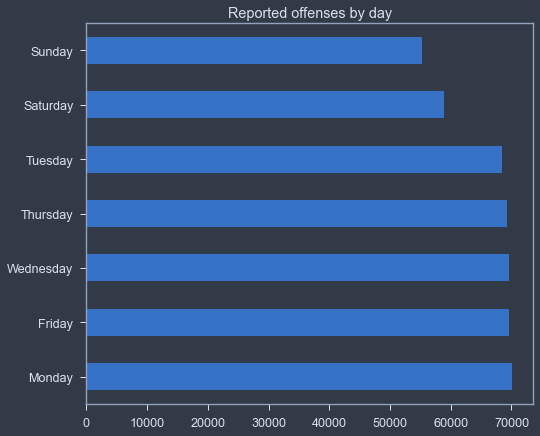

In [58]:
wd_counts.plot(kind = 'barh', title = 'Reported offenses by day')

<AxesSubplot:>

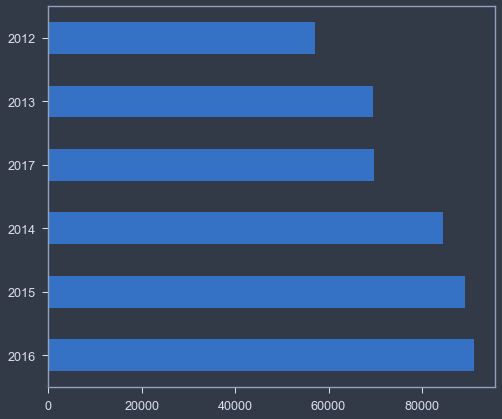

In [59]:
#we could count by years
y_crimes = crime['REPORTED_DATE'].dt.year.value_counts()
y_crimes.plot(kind = 'barh')

We need to group by both weekday and year. One way of doing this is saving the
weekday and year Series to separate variables and then using these variables
with the groupby method:

In [60]:
weekdays = crime['REPORTED_DATE'].dt.day_name()
year = crime['REPORTED_DATE'].dt.year

In [61]:
crime_byw_y = crime.groupby([year, weekdays]).size()
crime_byw_y

REPORTED_DATE  REPORTED_DATE
2012           Friday            8549
               Monday            8786
               Saturday          7442
               Sunday            7189
               Thursday          8440
               Tuesday           8191
               Wednesday         8440
2013           Friday           10380
               Monday           10627
               Saturday          8875
               Sunday            8444
               Thursday         10431
               Tuesday          10416
               Wednesday        10354
2014           Friday           12683
               Monday           12813
               Saturday         10950
               Sunday           10278
               Thursday         12309
               Tuesday          12440
               Wednesday        12948
2015           Friday           13273
               Monday           13452
               Saturday         11586
               Sunday           10624
               Thursd

```We have aggregated the data correctly but the structure isn't exactly conducive to
make comparisons easily.```

```Let's first rename those meaningless index level names
and then unstack the weekday level to get us a more readable table```

In [62]:
crime_table = crime_byw_y.rename_axis(['Year', 'Weekday']).unstack('Weekday') 
#rename axis para ponerle year and weekday a las columnas enves de REPORTED DATE REPORTED DATE
                                                                                        
crime_table

Weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Year,,,,,,,
2012,8549,8786,7442,7189,8440,8191,8440
2013,10380,10627,8875,8444,10431,10416,10354
2014,12683,12813,10950,10278,12309,12440,12948
2015,13273,13452,11586,10624,13512,13381,13320
2016,14059,13708,11467,10554,14050,13338,13900
2017,10677,10638,8514,8124,10545,10628,10576


In [63]:
#si vemos las graficas anteriores, casi al inicio del uso de esta base de datos, a 2017 le hacen falta datos
#podemos hace una simple extrapolacion para resolver esto.

#1. Let's first find the last day that we have data for in 2017:
criteria = crime['REPORTED_DATE'].dt.year == 2017
crime.loc[criteria, 'REPORTED_DATE'].dt.dayofyear.max()

272

In [64]:
# 2. look at our historical data and calculate the average percentage
# of crimes that have taken place through the first 272 days of the year:
round(272/365, 3)

0.745

In [65]:
crime_pct = crime['REPORTED_DATE'].dt.dayofyear.le(272).groupby(year).mean().round(3)
crime_pct

REPORTED_DATE
2012    0.748
2013    0.725
2014    0.751
2015    0.748
2016    0.752
2017    1.000
Name: REPORTED_DATE, dtype: float64

In [66]:
#3. select all years except 2017 (the one to extrapolate) and have the median 
crime_pct.loc[2012:2016].median()

0.748

In [67]:
#divide the last value on the 2017 year values
crime_table.loc[2017] = crime_table.loc[2017].div(.748).astype('int')
crime_table

Weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Year,,,,,,,
2012,8549,8786,7442,7189,8440,8191,8440
2013,10380,10627,8875,8444,10431,10416,10354
2014,12683,12813,10950,10278,12309,12440,12948
2015,13273,13452,11586,10624,13512,13381,13320
2016,14059,13708,11467,10554,14050,13338,13900
2017,14274,14221,11382,10860,14097,14208,14139


In [68]:
crime2 = crime_table.reset_index()

In [69]:
crime2 = crime2[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]

<AxesSubplot:xlabel='Weekday'>

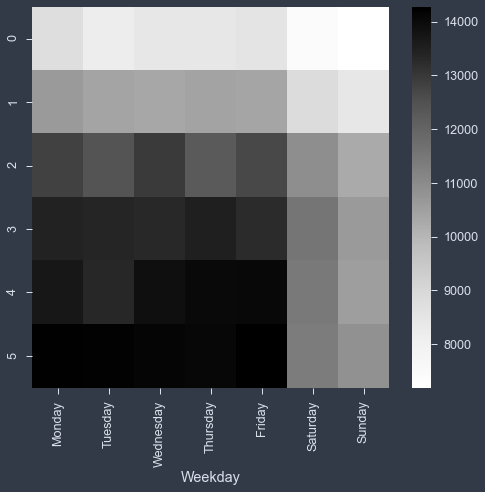

In [70]:
#Ahora va acorde a lo visto anteriormente
#let's see the table on a heatmap

import seaborn as sns
sns.heatmap(crime2, cmap = 'Greys')

## Grouping by a Timestamp and another column

In [73]:
url = 'https://raw.githubusercontent.com/PacktPublishing/Pandas-Cookbook/master/data/employee.csv'
employee = pd.read_csv(url, parse_dates=['JOB_DATE', 'HIRE_DATE'], index_col='HIRE_DATE')
employee.head()

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,JOB_DATE
HIRE_DATE,,,,,,,,,
2006-06-12,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2012-10-13
2000-07-19,1,LIBRARY ASSISTANT,Library,26125.0,Hispanic/Latino,Full Time,Female,Active,2010-09-18
2015-02-03,2,POLICE OFFICER,Houston Police Department-HPD,45279.0,White,Full Time,Male,Active,2015-02-03
1982-02-08,3,ENGINEER/OPERATOR,Houston Fire Department (HFD),63166.0,White,Full Time,Male,Active,1991-05-25
1989-06-19,4,ELECTRICIAN,General Services Department,56347.0,White,Full Time,Male,Active,1994-10-22


In [74]:
#et's first do a simple grouping by just gender, and find the average salary for each:
employee.groupby('GENDER')['BASE_SALARY'].mean().round(2)

GENDER
Female    52168.34
Male      57354.61
Name: BASE_SALARY, dtype: float64

In [75]:
#Let's find the average salary based on hire date, and group everyone into 10-year buckets:

# 10AS to form groups in 10-year increments of time. The A is the alias for year and the S informs us 
#that the beginning of the period is used as the label.

employee.resample('10AS')['BASE_SALARY'].mean().round(2)

HIRE_DATE
1958-01-01     81239.00
1968-01-01    106477.33
1978-01-01     69560.49
1988-01-01     62301.62
1998-01-01     58195.37
2008-01-01     47236.63
Freq: 10AS-JAN, Name: BASE_SALARY, dtype: float64

In [77]:
#If we wanted to group by both gender and a five-year time span, we can call resample directly
#after calling groupby

sal_avg = employee.groupby('GENDER').resample('10AS')['BASE_SALARY'].mean().round(0)
sal_avg

GENDER  HIRE_DATE 
Female  1975-01-01     51617.0
        1985-01-01     57557.0
        1995-01-01     55536.0
        2005-01-01     51660.0
        2015-01-01     38583.0
Male    1958-01-01     81239.0
        1968-01-01    106477.0
        1978-01-01     72266.0
        1988-01-01     64626.0
        1998-01-01     59670.0
        2008-01-01     47202.0
Name: BASE_SALARY, dtype: float64

In [78]:
#Let's unstack gender columns to compare better
sal_avg.unstack('GENDER')

GENDER,Female,Male
HIRE_DATE,,
1958-01-01,NaN,81239.0
1968-01-01,NaN,106477.0
1975-01-01,51617.0,NaN
1978-01-01,NaN,72266.0
1985-01-01,57557.0,NaN
1988-01-01,NaN,64626.0
1995-01-01,55536.0,NaN
1998-01-01,NaN,59670.0
2005-01-01,51660.0,NaN


The 10-year periods for males and females do not begin on the same date. This
happened because the data was first grouped by gender and then, within each
gender, more groups were formed based on hire dates.

In [81]:
print(employee[employee['GENDER'] == 'Male'].index.min())
print(employee[employee['GENDER'] == 'Female'].index.min())
#the female employe was employed until 1975, that is why there is no registers and therefore NaN value

1958-12-29 00:00:00
1975-06-09 00:00:00


In [83]:
#We need to group the date grou within the groupby function using the Grouper(freq=) part

sal_avg2 = employee.groupby(['GENDER', pd.Grouper(freq='10AS')])['BASE_SALARY'].mean().round(2)
sal_avg2

GENDER  HIRE_DATE 
Female  1968-01-01          NaN
        1978-01-01     57072.46
        1988-01-01     57117.77
        1998-01-01     54738.44
        2008-01-01     47305.26
Male    1958-01-01     81239.00
        1968-01-01    106477.33
        1978-01-01     72266.23
        1988-01-01     64626.06
        1998-01-01     59669.77
        2008-01-01     47201.82
Name: BASE_SALARY, dtype: float64

In [85]:
sal_final = sal_avg2.unstack('GENDER')
sal_final

GENDER,Female,Male
HIRE_DATE,,
1958-01-01,NaN,81239.00
1968-01-01,NaN,106477.33
1978-01-01,57072.46,72266.23
1988-01-01,57117.77,64626.06
1998-01-01,54738.44,59669.77
2008-01-01,47305.26,47201.82


In [86]:
#the table can be improved to show the intervals. because when we look at the previous table we don't 
#atumatically assume is ten years, so we can change that with this code:

years = sal_final.index.year
years

Int64Index([1958, 1968, 1978, 1988, 1998, 2008], dtype='int64', name='HIRE_DATE')

In [88]:
years_right = years + 9 #the years at the right of the interval: [1985 - x (<- those)]
sal_final.index = years.astype(str) + '-' + years_right.astype(str)
sal_final

GENDER,Female,Male
HIRE_DATE,,
1958-1967,NaN,81239.00
1968-1977,NaN,106477.33
1978-1987,57072.46,72266.23
1988-1997,57117.77,64626.06
1998-2007,54738.44,59669.77
2008-2017,47305.26,47201.82


## Finding the last time crime was 20% lower with merge_asof

```For example, we might be interested in the last time unemployment was below 5% or the last time the stock market went up five days in a row or the last time you had eight hours of sleep.``` 

> ```The merge_asof function provides answers to these types of questions.```

In [91]:
crime_sort = pd.read_hdf(r"C:\Users\MSI\Desktop\Kookmin\Second semester\Programming analysis\Pandas Cookbook\crime.h5",).set_index('REPORTED_DATE').sort_index()

In [92]:
crime_sort

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0
...,...,...,...,...,...,...,...
2017-09-29 03:58:00,traf-other,all-other-crimes,-104.994817,39.768043,globeville,1,0
2017-09-29 03:58:00,burglary-business-by-force,burglary,-104.987803,39.681199,overland,1,0
2017-09-29 04:12:00,traf-other,all-other-crimes,-105.006426,39.783139,sunnyside,1,0


In [93]:
#Find the last full month of data:
crime_sort.index.max()

Timestamp('2017-09-29 06:16:00')

In [94]:
#As we don't quite have all of September's data, let's drop it from our dataset and find the last full month again
crime_sort = crime_sort[:'2017-8']
crime_sort.index.max()

Timestamp('2017-08-31 23:52:00')

In [104]:
#Let's count the number of crimes and traffic accidents for every month:
all_data = crime_sort.groupby([pd.Grouper(freq= 'M'), #frequency time = Month
                   "OFFENSE_CATEGORY_ID"]).size()
all_data

REPORTED_DATE  OFFENSE_CATEGORY_ID     
2012-01-31     aggravated-assault           113
               all-other-crimes             124
               arson                          5
               auto-theft                   275
               burglary                     343
                                           ... 
2017-08-31     robbery                      108
               sexual-assault                57
               theft-from-motor-vehicle     675
               traffic-accident            2126
               white-collar-crime           138
Length: 1020, dtype: int64

In [105]:
#Although the merge_asof function can work with the index, it will be easier to
#just reset it: (THIS IS THEN OPTIONAL)
all_data  = all_data.sort_values().reset_index(name = 'Total')
all_data.head()

,REPORTED_DATE,OFFENSE_CATEGORY_ID,Total
0,2012-01-31,murder,0
1,2016-05-31,murder,1
2,2013-01-31,arson,1
3,2016-12-31,murder,1
4,2014-12-31,murder,1


In [107]:
# Let's get the current month's crime count and make a new column to represent the goal:
goal = all_data[all_data['REPORTED_DATE'] == '2017-8-31'].reset_index(drop=True)

In [113]:
goal = goal['Total_Goal'] = goal['Total'].mul(.8).astype(int)

In [114]:
goal.head()

0      5
1      5
2     45
3     86
4    110
Name: Total, dtype: object

#### averiguar el merge_asof

In [115]:
# pd.merge_asof(goal, all_data, left_on='Total_Goal', right_on='Total', by='OFFENSE_CATEGORY_ID',
#               suffixes=('_Current', '_Last'))

KeyError: 'OFFENSE_CATEGORY_ID'